<a href="https://colab.research.google.com/github/pacomm5/curso-series-temporales/blob/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/3_Trabajando_con_series_de_tiempo_en_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Relevant Packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/MaddoSaru/curso-series-temporales/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True) # convertimos la variable data en fehca
df_comp.set_index("date", inplace=True) # la ponemos como indice.
df_comp=df_comp.asfreq('b') # le decimo que solo nos coja los dias laborales.
df_comp=df_comp.fillna(method='ffill') # aqui le decimos que rellene los valores nan con el posterior. 



### Removing Surplus Data

In [5]:
df_comp['market_value']=df_comp.spx # creamos la variable market value que es igual que el spx

In [6]:
del df_comp['spx'] # borramos todos los indices y nos quedamos con market value. 
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8) # aqui le damos el tamaño al training
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:] # aqui decimo cual va a ser el training y el test

### White Noise

In [9]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
# ahora vamos geneerar ruido blanco. el metodo se llama random.normal. le tenemos que pasar la media, la desviación estandar, y el tamaño. 
# loc es el el parametro y le decimos que es igual a la media de df.market_value
# scale es otro parametro que es la desviación standar. 
# size es el tamaño. 

In [10]:
df['wn'] = wn # aui creamos la columna wn que será la columna de ruido blanco. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df.describe() # aqui ya nos aparece la columna de ruido blanco. 
# el count es igual, la media como son numero aleatorios es parecida, y el resto de de datos estadisticos parecido. 

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1098.219567
std,292.559287,293.675186
min,438.920000,9.587940
25%,914.620000,899.273762
50%,1144.650000,1092.754280
75%,1316.280729,1295.626640
max,1570.252238,2129.424665


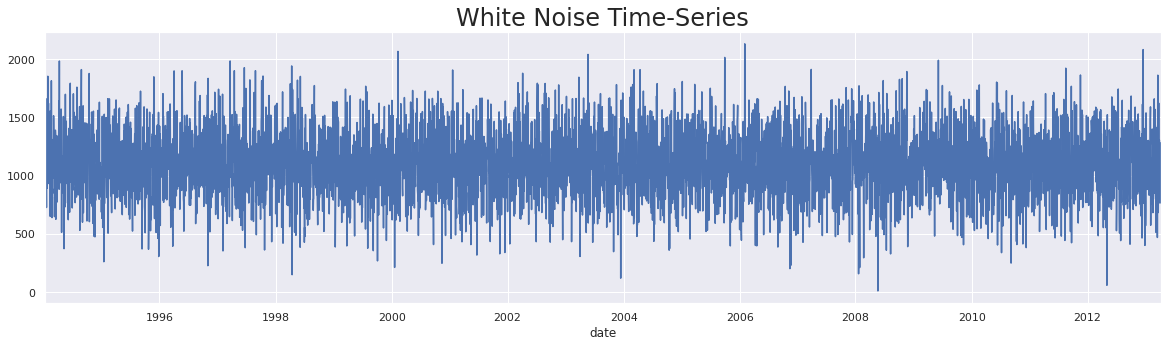

In [13]:
df.wn.plot(figsize = (20,5)) # aui creamos el grafico. 
plt.title("White Noise Time-Series", size= 24) # 
plt.show()
# ya nos pone la fecha porque lo pusimos anteriormente en las fechas. vemos que es un comportamiento aleatorio 

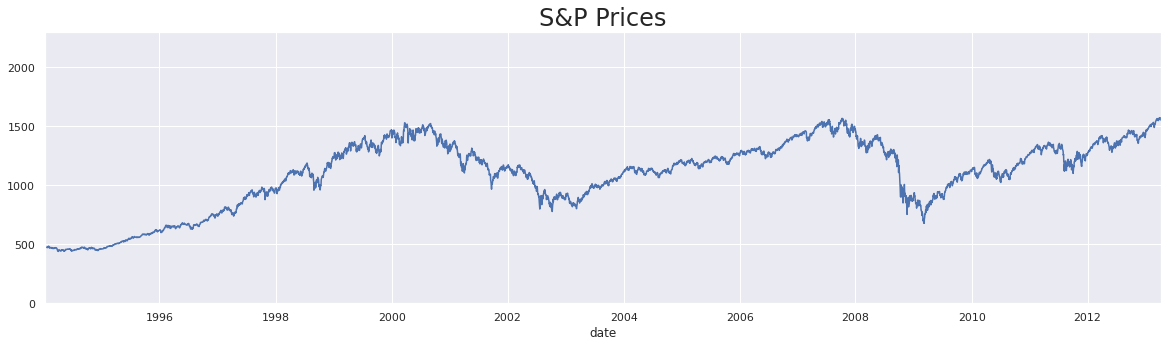

In [15]:
# aqui sacamos el plot de market value. 
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300) # esto se pone para cambiar la escala en el eje y. y sea comparable con la de arriba. 
plt.show()

### Random Walk

In [17]:
rw = pd.read_csv("https://raw.githubusercontent.com/pacomm5/curso-series-temporales/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/RandWalk.csv")
# el valor del periodo t, sería igual al t-1 mas el ruido blanco. 
# las mejores estiamciones para el precio de mañana, serán los precios de hoy. 


In [18]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [19]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)


In [20]:
rw.set_index("date", inplace = True)


In [21]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [22]:
rw = rw.asfreq('b')

In [23]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [24]:
df['rw'] = rw.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.head() # ya hemos incluido rw al df anterior

,market_value,wn,rw
date,,,
1994-01-07,469.90,1002.067099,1122.139662
1994-01-10,475.27,1891.832874,1080.347860
1994-01-11,474.13,809.075809,1082.095245
1994-01-12,474.17,940.268735,1083.639265
1994-01-13,472.47,1215.818763,1067.146255


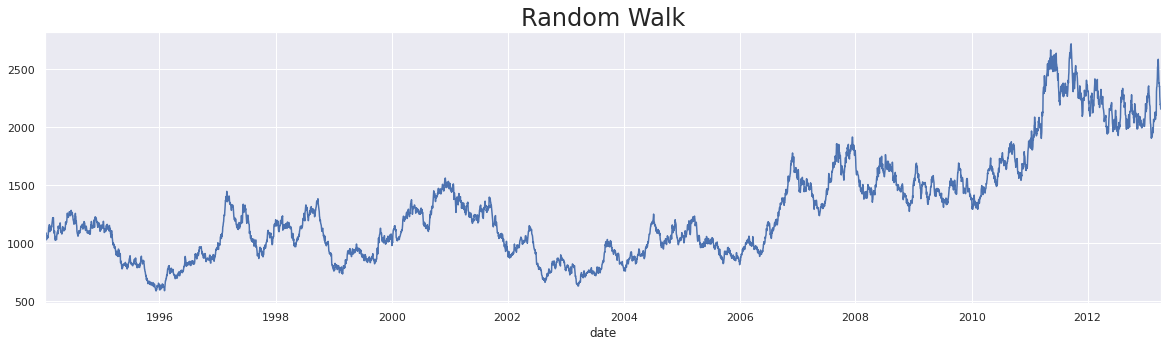

In [28]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()
# es muy diferente al del ruido blanco. es muy parecido al del sp 500

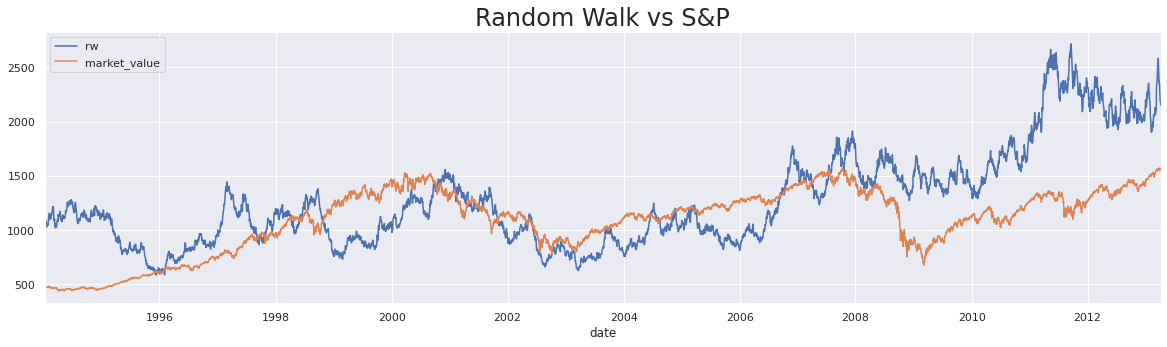

In [30]:
df.rw.plot(figsize = (20,5)) # ponemos los dos juntos
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Stationarity

# la media y la varianza son constantes cuando no hay tendencia. es decir es estacionaria y las covarianzas serán iguales. es decir existe estacionalidad debilmente estacionaria, cuando el ruido blanco es 0. la estacionalidad estricta es cuando tienen distribuciones identicas. esto es ultimo dificil por lo tanto se suele utilizar la estacionaridad debil. 

In [31]:
sts.adfuller(df.market_value)

(-1.7369847452352458,
 0.41216456967706105,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In [ ]:
sts.adfuller(df.wn)

(-69.43972849152433,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 70827.67556232118)

In [ ]:
sts.adfuller(df.rw)


(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

### Seasonality

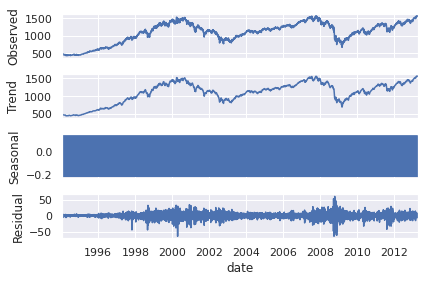

In [ ]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

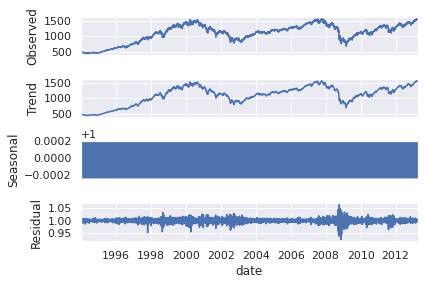

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

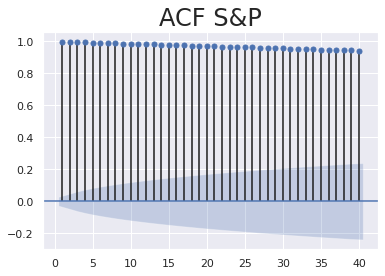

In [ ]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

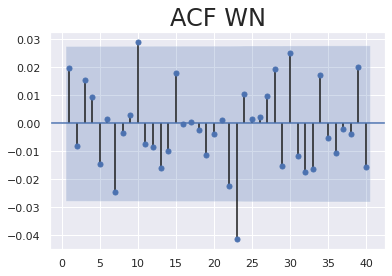

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

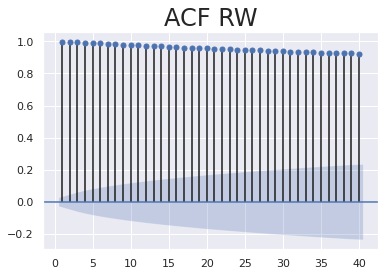

In [ ]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

### PACF

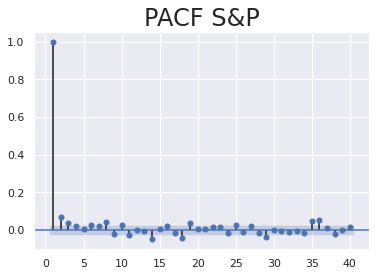

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

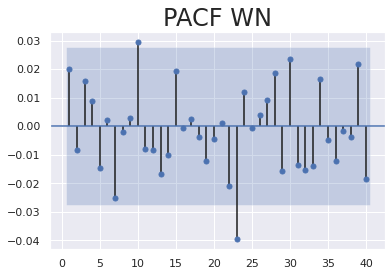

In [ ]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

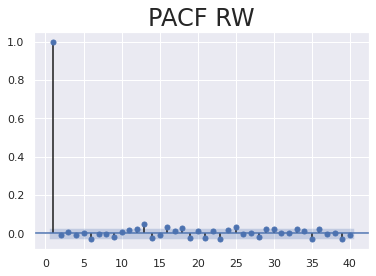

In [ ]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()